In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("employee_attrition.csv")

In [4]:
print("First 5 rows:\n", df.head())

First 5 rows:
    Age Department  Years_At_Company  Salary Overtime  JobSatisfaction  \
0   29      Sales                12      38       No                3   
1   23    Finance                12      98       No                1   
2   39       Tech                19      46       No                1   
3   37    Finance                14      46       No                5   
4   36       Tech                16      90       No                4   

  Attrition  
0        No  
1       Yes  
2        No  
3       Yes  
4       Yes  


In [5]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               50 non-null     int64 
 1   Department        50 non-null     object
 2   Years_At_Company  50 non-null     int64 
 3   Salary            50 non-null     int64 
 4   Overtime          50 non-null     object
 5   JobSatisfaction   50 non-null     int64 
 6   Attrition         50 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.9+ KB
None


In [6]:
print("\nSummary statistics:\n", df.describe(include="all"))



Summary statistics:
              Age Department  Years_At_Company      Salary Overtime  \
count   50.00000         50          50.00000   50.000000       50   
unique       NaN          4               NaN         NaN        2   
top          NaN         HR               NaN         NaN      Yes   
freq         NaN         16               NaN         NaN       26   
mean    35.22000        NaN          10.20000   65.340000      NaN   
std      8.78842        NaN           6.38557   22.293598      NaN   
min     22.00000        NaN           0.00000   30.000000      NaN   
25%     27.25000        NaN           5.00000   46.000000      NaN   
50%     35.50000        NaN          10.00000   60.500000      NaN   
75%     42.25000        NaN          16.00000   86.750000      NaN   
max     54.00000        NaN          20.00000  100.000000      NaN   

        JobSatisfaction Attrition  
count         50.000000        50  
unique              NaN         2  
top                 NaN      

In [7]:
print("\nMissing values:\n", df.isna().sum())


Missing values:
 Age                 0
Department          0
Years_At_Company    0
Salary              0
Overtime            0
JobSatisfaction     0
Attrition           0
dtype: int64


In [8]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

In [9]:
for col in df.select_dtypes(include=["object"]).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


In [12]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # updated

if cat_cols:
    X_cat = pd.DataFrame(
        ohe.fit_transform(X[cat_cols]),
        columns=ohe.get_feature_names_out(cat_cols),
        index=X.index
    )
    X_num = X.drop(columns=cat_cols)
    X = pd.concat([X_num, X_cat], axis=1)

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
print("\nNumber of trees:", len(rf.estimators_))
print("Number of features:", rf.n_features_in_)


Number of trees: 100
Number of features: 10


In [16]:
y_pred = rf.predict(X_test)

In [17]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4666666666666667

Confusion Matrix:
 [[5 2]
 [6 2]]

Classification Report:
               precision    recall  f1-score   support

          No       0.45      0.71      0.56         7
         Yes       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15



In [18]:
print("\n--- Model Tuning Results ---")
for n in [50, 100, 200]:
    for depth in [None, 5, 10]:
        for crit in ["gini", "entropy"]:
            model = RandomForestClassifier(
                n_estimators=n, max_depth=depth, criterion=crit, random_state=42
            )
            model.fit(X_train, y_train)
            acc = accuracy_score(y_test, model.predict(X_test))
            print(f"n_estimators={n}, max_depth={depth}, criterion={crit}, Accuracy={acc:.3f}")




--- Model Tuning Results ---
n_estimators=50, max_depth=None, criterion=gini, Accuracy=0.533
n_estimators=50, max_depth=None, criterion=entropy, Accuracy=0.467
n_estimators=50, max_depth=5, criterion=gini, Accuracy=0.533
n_estimators=50, max_depth=5, criterion=entropy, Accuracy=0.400
n_estimators=50, max_depth=10, criterion=gini, Accuracy=0.533
n_estimators=50, max_depth=10, criterion=entropy, Accuracy=0.467
n_estimators=100, max_depth=None, criterion=gini, Accuracy=0.467
n_estimators=100, max_depth=None, criterion=entropy, Accuracy=0.467
n_estimators=100, max_depth=5, criterion=gini, Accuracy=0.467
n_estimators=100, max_depth=5, criterion=entropy, Accuracy=0.467
n_estimators=100, max_depth=10, criterion=gini, Accuracy=0.467
n_estimators=100, max_depth=10, criterion=entropy, Accuracy=0.467
n_estimators=200, max_depth=None, criterion=gini, Accuracy=0.533
n_estimators=200, max_depth=None, criterion=entropy, Accuracy=0.533
n_estimators=200, max_depth=5, criterion=gini, Accuracy=0.467
n_e

In [19]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nTop 10 Important Features:\n", importances.head(10))



Top 10 Important Features:
               Feature  Importance
2              Salary    0.266364
0                 Age    0.233453
1    Years_At_Company    0.188257
3     JobSatisfaction    0.119719
7     Department_Tech    0.040447
4  Department_Finance    0.039350
5       Department_HR    0.036952
6    Department_Sales    0.029180
9        Overtime_Yes    0.025629
8         Overtime_No    0.020650


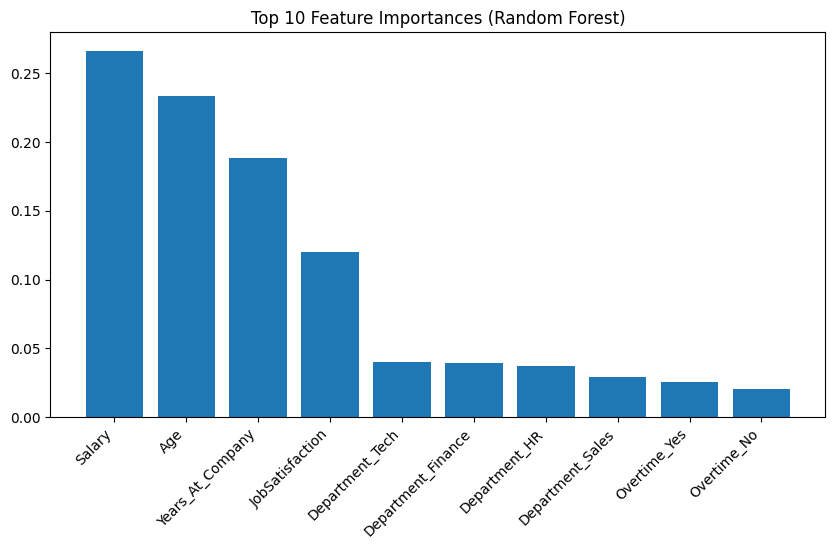

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(importances["Feature"][:10], importances["Importance"][:10])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()
